In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

# Manual FE

In [2]:
pd.set_option('display.max_columns', None)

bur=pd.read_csv('data/bureau.csv')
bur.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [3]:
# desc=pd.read_csv('data/HomeCredit_columns_description.csv',encoding = "ISO-8859-1").to_excel('data/HomeCredit_columns_description.xlsx')

In [4]:
pd.options.display.float_format = '{:.2f}'.format
bur.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.00,278214.93,102938.56,100001.00,188866.75,278055.00,367426.00,456255.00
SK_ID_BUREAU,1716428.00,5924434.49,532265.73,5000000.00,5463953.75,5926303.50,6385681.25,6843457.00
DAYS_CREDIT,1716428.00,-1142.11,795.16,-2922.00,-1666.00,-987.00,-474.00,0.00
CREDIT_DAY_OVERDUE,1716428.00,0.82,36.54,0.00,0.00,0.00,0.00,2792.00
DAYS_CREDIT_ENDDATE,1610875.00,510.52,4994.22,-42060.00,-1138.00,-330.00,474.00,31199.00
DAYS_ENDDATE_FACT,1082775.00,-1017.44,714.01,-42023.00,-1489.00,-897.00,-425.00,0.00
AMT_CREDIT_MAX_OVERDUE,591940.00,3825.42,206031.61,0.00,0.00,0.00,0.00,115987185.00
CNT_CREDIT_PROLONG,1716428.00,0.01,0.10,0.00,0.00,0.00,0.00,9.00
AMT_CREDIT_SUM,1716415.00,354994.59,1149811.34,0.00,51300.00,125518.50,315000.00,585000000.00
AMT_CREDIT_SUM_DEBT,1458759.00,137085.12,677401.13,-4705600.32,0.00,0.00,40153.50,170100000.00


* **DAYS_CREDIT_ENDDATE -115 and 85 years???**
* AMT_CREDIT_SUM_DEBT 585000000??
* AMT_CREDIT_MAX_OVERDUE 115987185.00
* AMT_CREDIT_SUM_DEBT 170100000.00
* AMT_CREDIT_SUM_LIMIT 4705600.32
* AMT_CREDIT_SUM_OVERDUE 3756681.00
* **AMT_ANNUITY 118453423.50???**


In [5]:
credit_count=bur.groupby('SK_ID_CURR')['SK_ID_BUREAU'].agg('count').to_frame().reset_index()
credit_count.rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'}, inplace=True)
credit_count.head(10)

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
5,100007,1
6,100008,3
7,100009,18
8,100010,2
9,100011,4


In [6]:
train=pd.read_csv('data/application_train.csv')
print(train.shape)

train=train.merge(credit_count, on='SK_ID_CURR', how='left')
train['previous_loan_counts'].fillna(0, inplace=True)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,8.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,4.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
train['TARGET'].corr(train['AMT_ANNUITY'])

-0.012816561515413598

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 4.6131
Median value for loan that was repaid = 4.7785


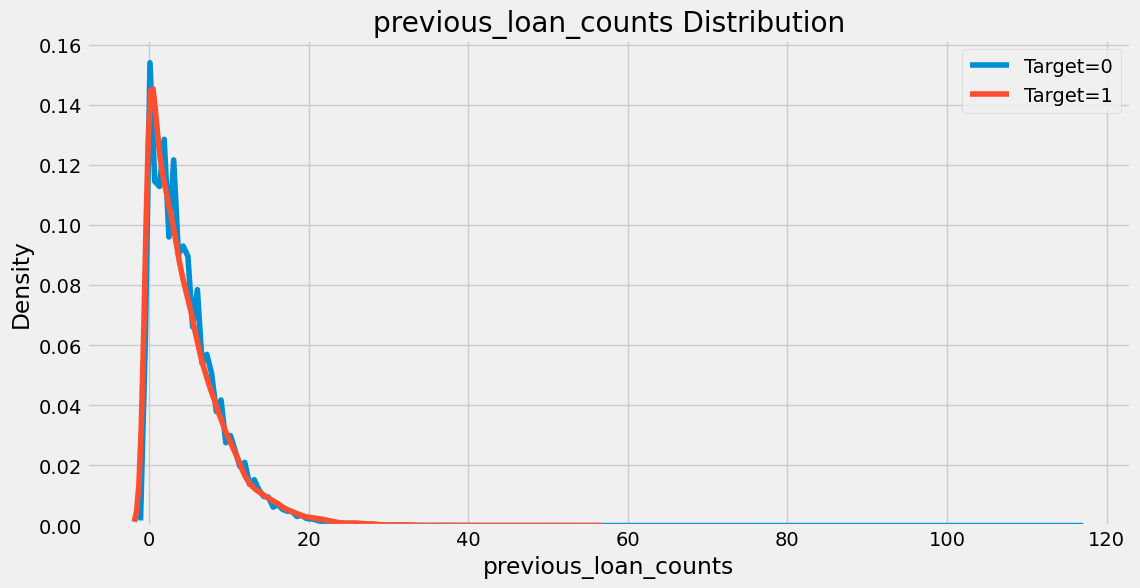

In [8]:
def kde_target(col, df):
    corr=df['TARGET'].corr(df[col])

    plt.figure(figsize=(12, 6))
    sns.kdeplot(df.loc[df['TARGET']==0, col], label='Target=0')
    sns.kdeplot(df.loc[df['TARGET']==1, col], label='Target=1')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title('%s Distribution' % col)
    plt.legend()
    print('The correlation between %s and the TARGET is %0.4f' % (col, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % np.mean(df.loc[df['TARGET']==1, col]))
    print('Median value for loan that was repaid = %0.4f' % np.mean(df.loc[df['TARGET']==0, col]))

kde_target('previous_loan_counts', train)

In [9]:
bur_agg=bur.drop('SK_ID_BUREAU', axis=1).groupby('SK_ID_CURR').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bur_agg.head()

SK_ID_CURR DAYS_CREDIT                           CREDIT_DAY_OVERDUE       \
                   count     mean  max   min   sum              count mean   
0     100001           7  -735.00  -49 -1572 -5145                  7 0.00   
1     100002           8  -874.00 -103 -1437 -6992                  8 0.00   
2     100003           4 -1400.75 -606 -2586 -5603                  4 0.00   
3     100004           2  -867.00 -408 -1326 -1734                  2 0.00   
4     100005           3  -190.67  -62  -373  -572                  3 0.00   

              DAYS_CREDIT_ENDDATE                                    \
  max min sum               count    mean     max      min      sum   
0   0   0   0                   7   82.43 1778.00 -1329.00   577.00   
1   0   0   0                   6 -349.00  780.00 -1072.00 -2094.00   
2   0   0   0                   4 -544.50 1216.00 -2434.00 -2178.00   
3   0   0   0                   2 -488.50 -382.00  -595.00  -977.00   
4   0   0   0                   3  439.33 1324.00  -128.00  1318.00   

  DAYS_ENDDATE_FACT                                    AMT_CREDIT_MAX_OVERDUE  \
              count     mean     max      min      sum                  count   
0                 4  -825.50 -544.00 -1328.00 -3302.00                      0   
1                 6  -697.50  -36.00 -1185.00 -4185.00                      5   
2                 3 -1097.33 -540.00 -2131.00 -3292.00                      4   
3                 2  -532.50 -382.00  -683.00 -1065.00                      1   
4                 1  -123.00 -123.00  -123.00  -123.00                      1   

                               CNT_CREDIT_PROLONG                   \
     mean     max  min     sum              count mean max min sum   
0     NaN     NaN  NaN    0.00                  7 0.00   0   0   0   
1 1681.03 5043.65 0.00 8405.15                  8 0.00   0   0   0   
2    0.00    0.00 0.00    0.00                  4 0.00   0   0   0   
3    0.00    0.00 0.00    0.00                  2 0.00   0   0   0   
4    0.00    0.00 0.00    0.00                  3 0.00   0   0   0   

  AMT_CREDIT_SUM                                         AMT_CREDIT_SUM_DEBT  \
           count      mean       max      min        sum               count   
0              7 207623.57 378000.00 85500.00 1453365.00                   7   
1              8 108131.95 450000.00     0.00  865055.56                   5   
2              4 254350.12 810000.00 22248.00 1017400.50                   4   
3              2  94518.90  94537.80 94500.00  189037.80                   2   
4              3 219042.00 568800.00 29826.00  657126.00                   3   

                                     AMT_CREDIT_SUM_LIMIT                      \
       mean       max  min       sum                count      mean       max   
0  85240.93 373239.00 0.00 596686.50                    6      0.00      0.00   
1  49156.20 245781.00 0.00 245781.00                    4   7997.14  31988.56   
2      0.00      0.00 0.00      0.00                    4 202500.00 810000.00   
3      0.00      0.00 0.00      0.00                    2      0.00      0.00   
4 189469.50 543087.00 0.00 568408.50                    3      0.00      0.00   

                 AMT_CREDIT_SUM_OVERDUE                      \
   min       sum                  count mean  max  min  sum   
0 0.00      0.00                      7 0.00 0.00 0.00 0.00   
1 0.00  31988.56                      8 0.00 0.00 0.00 0.00   
2 0.00 810000.00                      4 0.00 0.00 0.00 0.00   
3 0.00      0.00                      2 0.00 0.00 0.00 0.00   
4 0.00      0.00                      3 0.00 0.00 0.00 0.00   

  DAYS_CREDIT_UPDATE                          AMT_ANNUITY                   \
               count    mean  max   min   sum       count    mean      max   
0                  7  -93.14   -6  -155  -652           7 3545.36 10822.50   
1                  8 -499.88   -7 -1185 -3999           7    0.00     0.00   
2              

In [10]:
columns=['SK_ID_CURR']

for i in bur_agg.columns.levels[0]:
    if i!='SK_ID_CURR':
        for j in bur_agg.columns.levels[1][:-1]:
            columns.append('bureau_'+i+'_'+j)

In [11]:
bur_agg.columns=columns
bur_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.00,-49,-1572,-5145,7,0.00,0,0,0,7,82.43,1778.00,-1329.00,577.00,4,-825.50,-544.00,-1328.00,-3302.00,0,NaN,NaN,NaN,0.00,7,0.00,0,0,0,7,207623.57,378000.00,85500.00,1453365.00,7,85240.93,373239.00,0.00,596686.50,6,0.00,0.00,0.00,0.00,7,0.00,0.00,0.00,0.00,7,-93.14,-6,-155,-652,7,3545.36,10822.50,0.00,24817.50
1,100002,8,-874.00,-103,-1437,-6992,8,0.00,0,0,0,6,-349.00,780.00,-1072.00,-2094.00,6,-697.50,-36.00,-1185.00,-4185.00,5,1681.03,5043.65,0.00,8405.15,8,0.00,0,0,0,8,108131.95,450000.00,0.00,865055.56,5,49156.20,245781.00,0.00,245781.00,4,7997.14,31988.56,0.00,31988.56,8,0.00,0.00,0.00,0.00,8,-499.88,-7,-1185,-3999,7,0.00,0.00,0.00,0.00
2,100003,4,-1400.75,-606,-2586,-5603,4,0.00,0,0,0,4,-544.50,1216.00,-2434.00,-2178.00,3,-1097.33,-540.00,-2131.00,-3292.00,4,0.00,0.00,0.00,0.00,4,0.00,0,0,0,4,254350.12,810000.00,22248.00,1017400.50,4,0.00,0.00,0.00,0.00,4,202500.00,810000.00,0.00,810000.00,4,0.00,0.00,0.00,0.00,4,-816.00,-43,-2131,-3264,0,NaN,NaN,NaN,0.00
3,100004,2,-867.00,-408,-1326,-1734,2,0.00,0,0,0,2,-488.50,-382.00,-595.00,-977.00,2,-532.50,-382.00,-683.00,-1065.00,1,0.00,0.00,0.00,0.00,2,0.00,0,0,0,2,94518.90,94537.80,94500.00,189037.80,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,-532.00,-382,-682,-1064,0,NaN,NaN,NaN,0.00
4,100005,3,-190.67,-62,-373,-572,3,0.00,0,0,0,3,439.33,1324.00,-128.00,1318.00,1,-123.00,-123.00,-123.00,-123.00,1,0.00,0.00,0.00,0.00,3,0.00,0,0,0,3,219042.00,568800.00,29826.00,657126.00,3,189469.50,543087.00,0.00,568408.50,3,0.00,0.00,0.00,0.00,3,0.00,0.00,0.00,0.00,3,-54.33,-11,-121,-163,3,1420.50,4261.50,0.00,4261.50


In [12]:
train=train.merge(bur_agg, on='SK_ID_CURR', how='left')
print(bur_agg.shape)
train.head()

(305811, 61)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min

In [13]:
new_corrs = []

for c in bur_agg.columns:
    new_corrs.append((c, train['TARGET'].corr(train[c])))

new_corrs=sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392113),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102051),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758661),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.04885350261111589),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483543),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306004),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03428110992161599),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -908.4120
Median value for loan that was repaid = -1097.6774


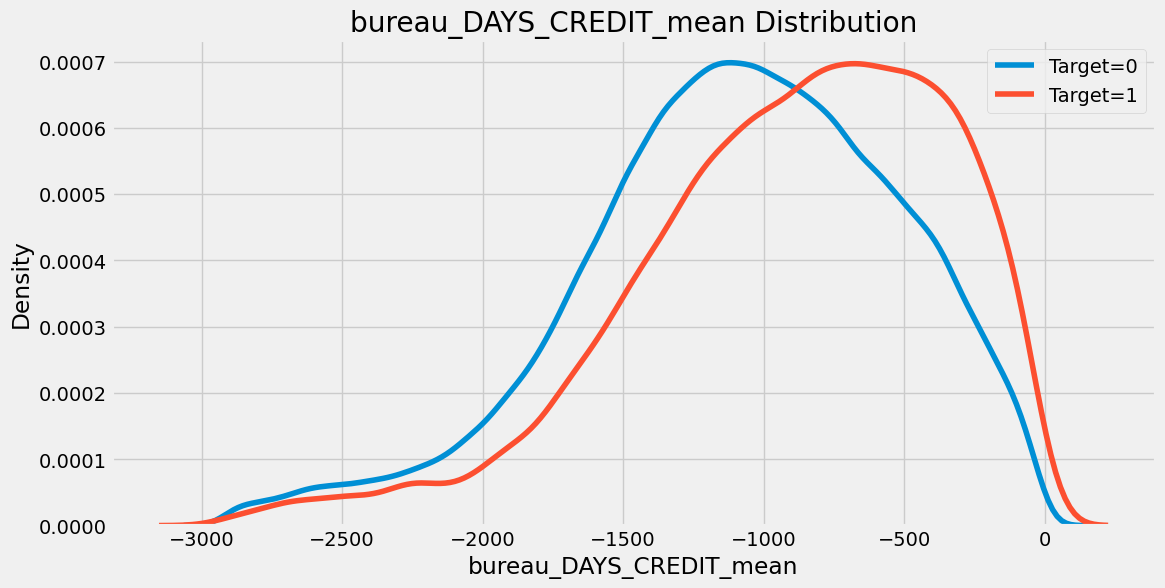

In [14]:
kde_target('bureau_DAYS_CREDIT_mean', train)

In [15]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [16]:
agg_num=agg_numeric(bur.drop('SK_ID_BUREAU', axis=1), group_var='SK_ID_CURR', df_name='bureau')
agg_num.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.00,-49,-1572,-5145,7,0.00,0,0,0,7,82.43,1778.00,-1329.00,577.00,4,-825.50,-544.00,-1328.00,-3302.00,0,NaN,NaN,NaN,0.00,7,0.00,0,0,0,7,207623.57,378000.00,85500.00,1453365.00,7,85240.93,373239.00,0.00,596686.50,6,0.00,0.00,0.00,0.00,7,0.00,0.00,0.00,0.00,7,-93.14,-6,-155,-652,7,3545.36,10822.50,0.00,24817.50
1,100002,8,-874.00,-103,-1437,-6992,8,0.00,0,0,0,6,-349.00,780.00,-1072.00,-2094.00,6,-697.50,-36.00,-1185.00,-4185.00,5,1681.03,5043.65,0.00,8405.15,8,0.00,0,0,0,8,108131.95,450000.00,0.00,865055.56,5,49156.20,245781.00,0.00,245781.00,4,7997.14,31988.56,0.00,31988.56,8,0.00,0.00,0.00,0.00,8,-499.88,-7,-1185,-3999,7,0.00,0.00,0.00,0.00
2,100003,4,-1400.75,-606,-2586,-5603,4,0.00,0,0,0,4,-544.50,1216.00,-2434.00,-2178.00,3,-1097.33,-540.00,-2131.00,-3292.00,4,0.00,0.00,0.00,0.00,4,0.00,0,0,0,4,254350.12,810000.00,22248.00,1017400.50,4,0.00,0.00,0.00,0.00,4,202500.00,810000.00,0.00,810000.00,4,0.00,0.00,0.00,0.00,4,-816.00,-43,-2131,-3264,0,NaN,NaN,NaN,0.00
3,100004,2,-867.00,-408,-1326,-1734,2,0.00,0,0,0,2,-488.50,-382.00,-595.00,-977.00,2,-532.50,-382.00,-683.00,-1065.00,1,0.00,0.00,0.00,0.00,2,0.00,0,0,0,2,94518.90,94537.80,94500.00,189037.80,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,-532.00,-382,-682,-1064,0,NaN,NaN,NaN,0.00
4,100005,3,-190.67,-62,-373,-572,3,0.00,0,0,0,3,439.33,1324.00,-128.00,1318.00,1,-123.00,-123.00,-123.00,-123.00,1,0.00,0.00,0.00,0.00,3,0.00,0,0,0,3,219042.00,568800.00,29826.00,657126.00,3,189469.50,543087.00,0.00,568408.50,3,0.00,0.00,0.00,0.00,3,0.00,0.00,0.00,0.00,3,-54.33,-11,-121,-163,3,1420.50,4261.50,0.00,4261.50


In [17]:
def target_corrs(df):
    new_corrs = []
    for c in df.columns:
        print(c)
        if c != 'TARGET':
            new_corrs.append((c, df['TARGET'].corr(df[c])))

    new_corrs=sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
    return new_corrs

In [19]:
cat=pd.get_dummies(bur.select_dtypes('object'))
cat['SK_ID_CURR']=bur['SK_ID_CURR']

col_names=cat.columns.to_list()
cat=cat[[col_names[-1]]+col_names[:-1]]
cat.head()

,SK_ID_CURR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,215354,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,215354,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,215354,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,215354,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
cat_group=cat.groupby('SK_ID_CURR').agg(['sum', 'mean'])
cat_group.head()

CREDIT_ACTIVE_Active      CREDIT_ACTIVE_Bad debt       \
                            sum mean                    sum mean   
SK_ID_CURR                                                         
100001                        3 0.43                      0 0.00   
100002                        2 0.25                      0 0.00   
100003                        1 0.25                      0 0.00   
100004                        0 0.00                      0 0.00   
100005                        2 0.67                      0 0.00   

           CREDIT_ACTIVE_Closed      CREDIT_ACTIVE_Sold       \
                            sum mean                sum mean   
SK_ID_CURR                                                     
100001                        4 0.57                  0 0.00   
100002                        6 0.75                  0 0.00   
100003                        3 0.75                  0 0.00   
100004                        2 1.00                  0 0.00   
100005                        1 0.33                  0 0.00   

           CREDIT_CURRENCY_currency 1      CREDIT_CURRENCY_currency 2       \
                                  sum mean                        sum mean   
SK_ID_CURR                                                                   
100001                              7 1.00                          0 0.00   
100002                              8 1.00                          0 0.00   
100003                              4 1.00                          0 0.00   
100004                              2 1.00                          0 0.00   
100005                              3 1.00                          0 0.00   

           CREDIT_CURRENCY_currency 3      CREDIT_CURRENCY_currency 4       \
                                  sum mean                        sum mean   
SK_ID_CURR                                                                   
100001                              0 0.00                          0 0.00   
100002                              0 0.00                          0 0.00   
100003                              0 0.00                          0 0.00   
100004                              0 0.00                          0 0.00   
100005                              0 0.00                          0 0.00   

           CREDIT_TYPE_Another type of loan      CREDIT_TYPE_Car loan       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0 0.00                    0 0.00   
100002                                    0 0.00                    0 0.00   
100003                                    0 0.00                    0 0.00   
100004                                    0 0.00                    0 0.00   
100005                                    0 0.00                    0 0.00   

           CREDIT_TYPE_Cash loan (non-earmarked)       \
                                             sum mean   
SK_ID_CURR                                              
100001                                         0 0.00   
100002                                         0 0.00   
100003                                         0 0.00   
100004                                         0 0.00   
100005                                         0 0.00   

           CREDIT_TYPE_Consumer credit      CREDIT_TYPE_Credit card       \
                                   sum mean                     sum mean   
SK_ID_CURR                                                                 
100001                               7 1.00                       0 0.00   
100002                               4 0.50                       4 0.50   
100003                               2 0.50                       2 0.50   
100004                               2 1.00                       0 0.00   
100005                               2 0.67                       1 0.33   

           C

In [21]:
cat[cat['SK_ID_CURR']==100001]

,SK_ID_CURR,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Cash loan (non-earmarked),CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
248484,100001,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
248485,100001,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
248486,100001,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
248487,100001,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
248488,100001,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
248489,100001,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
248490,100001,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [22]:
cols=[]

for l1 in cat_group.columns.levels[0]:
    for l2 in ['count', 'count_norm']:
        cols.append(l1+'_'+l2)
        
cat_group.columns=cols
cat_group.head()

,CREDIT_ACTIVE_Active_count,CREDIT_ACTIVE_Active_count_norm,CREDIT_ACTIVE_Bad debt_count,CREDIT_ACTIVE_Bad debt_count_norm,CREDIT_ACTIVE_Closed_count,CREDIT_ACTIVE_Closed_count_norm,CREDIT_ACTIVE_Sold_count,CREDIT_ACTIVE_Sold_count_norm,CREDIT_CURRENCY_currency 1_count,CREDIT_CURRENCY_currency 1_count_norm,CREDIT_CURRENCY_currency 2_count,CREDIT_CURRENCY_currency 2_count_norm,CREDIT_CURRENCY_currency 3_count,CREDIT_CURRENCY_currency 3_count_norm,CREDIT_CURRENCY_currency 4_count,CREDIT_CURRENCY_currency 4_count_norm,CREDIT_TYPE_Another type of loan_count,CREDIT_TYPE_Another type of loan_count_norm,CREDIT_TYPE_Car loan_count,CREDIT_TYPE_Car loan_count_norm,CREDIT_TYPE_Cash loan (non-earmarked)_count,CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,CREDIT_TYPE_Consumer credit_count,CREDIT_TYPE_Consumer credit_count_norm,CREDIT_TYPE_Credit card_count,CREDIT_TYPE_Credit card_count_norm,CREDIT_TYPE_Interbank credit_count,CREDIT_TYPE_Interbank credit_count_norm,CREDIT_TYPE_Loan for business development_count,CREDIT_TYPE_Loan for business development_count_norm,CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,CREDIT_TYPE_Loan for the purchase of equipment_count,CREDIT_TYPE_Loan for the purchase of equipment_count_norm,CREDIT_TYPE_Loan for working capital replenishment_count,CREDIT_TYPE_Loan for working capital replenishment_count_norm,CREDIT_TYPE_Microloan_count,CREDIT_TYPE_Microloan_count_norm,CREDIT_TYPE_Mobile operator loan_count,CREDIT_TYPE_Mobile operator loan_count_norm,CREDIT_TYPE_Mortgage_count,CREDIT_TYPE_Mortgage_count_norm,CREDIT_TYPE_Real estate loan_count,CREDIT_TYPE_Real estate loan_count_norm,CREDIT_TYPE_Unknown type of loan_count,CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,0.43,0,0.00,4,0.57,0,0.00,7,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,7,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100002,2,0.25,0,0.00,6,0.75,0,0.00,8,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,4,0.50,4,0.50,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100003,1,0.25,0,0.00,3,0.75,0,0.00,4,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,0.50,2,0.50,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100004,0,0.00,0,0.00,2,1.00,0,0.00,2,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100005,2,0.67,0,0.00,1,0.33,0,0.00,3,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,0.67,1,0.33,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [23]:
train=train.merge(cat_group, left_on='SK_ID_CURR', how='left', right_index = True)
# OR 
# train.merge(cat_group, on='SK_ID_CURR', how='left')
# left_on='SK_ID_CURR' and right_index = True means use column rom left df and index from right df for joining

In [25]:
train.shape

(307511, 229)

In [26]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [27]:
bur_counts=count_categorical(bur, 'SK_ID_CURR', 'bureau')
bur_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_count_norm,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_count_norm,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_count_norm,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_count_norm,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_count_norm,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_count_norm,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_count_norm,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_count_norm,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,0.43,0,0.00,4,0.57,0,0.00,7,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,7,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100002,2,0.25,0,0.00,6,0.75,0,0.00,8,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,4,0.50,4,0.50,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100003,1,0.25,0,0.00,3,0.75,0,0.00,4,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,0.50,2,0.50,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100004,0,0.00,0,0.00,2,1.00,0,0.00,2,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100005,2,0.67,0,0.00,1,0.33,0,0.00,3,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,0.67,1,0.33,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [28]:
bur_balance=pd.read_csv('data/bureau_balance.csv')
bur_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [29]:
bur_balance_counts=count_categorical(bur_balance, 'SK_ID_BUREAU', 'bureau_balance')
bur_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,86,0.89,11,0.11
5001710,5,0.06,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,48,0.58,30,0.36
5001711,3,0.75,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,1,0.25
5001712,10,0.53,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,9,0.47,0,0.00
5001713,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,22,1.00


In [30]:
bur_balance_agg=agg_numeric(bur_balance, 'SK_ID_BUREAU', 'bureau_balance')
bur_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.00,0,-96,-4656
1,5001710,83,-41.00,0,-82,-3403
2,5001711,4,-1.50,0,-3,-6
3,5001712,19,-9.00,0,-18,-171
4,5001713,22,-10.50,0,-21,-231


In [31]:
bur_by_loan = bur_balance_agg.merge(bur_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

bur_by_loan = bur_by_loan.merge(bur[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')

bur_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm,SK_ID_CURR
0,5001709,97,-48.00,0,-96,-4656,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,86,0.89,11,0.11,NaN
1,5001710,83,-41.00,0,-82,-3403,5,0.06,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,48,0.58,30,0.36,162368.00
2,5001711,4,-1.50,0,-3,-6,3,0.75,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,1,0.25,162368.00
3,5001712,19,-9.00,0,-18,-171,10,0.53,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,9,0.47,0,0.00,162368.00
4,5001713,22,-10.50,0,-21,-231,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,22,1.00,150635.00


In [32]:
bur_by_client=agg_numeric(bur_by_loan.drop('SK_ID_BUREAU', axis=1), 'SK_ID_CURR', 'client')
bur_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_max,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_count_sum,client_bureau_balance_MONTHS_BALANCE_mean_count,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,client_bureau_balance_MONTHS_BALANCE_mean_sum,client_bureau_balance_MONTHS_BALANCE_max_count,client_bureau_balance_MONTHS_BALANCE_max_mean,client_bureau_balance_MONTHS_BALANCE_max_max,client_bureau_balance_MONTHS_BALANCE_max_min,client_bureau_balance_MONTHS_BALANCE_max_sum,client_bureau_balance_MONTHS_BALANCE_min_count,client_bureau_balance_MONTHS_BALANCE_min_mean,client_bureau_balance_MONTHS_BALANCE_min_max,client_bureau_balance_MONTHS_BALANCE_min_min,client_bureau_balance_MONTHS_BALANCE_min_sum,client_bureau_balance_MONTHS_BALANCE_sum_count,client_bureau_balance_MONTHS_BALANCE_sum_mean,client_bureau_balance_MONTHS_BALANCE_sum_max,client_bureau_balance_MONTHS_BALANCE_sum_min,client_bureau_balance_MONTHS_BALANCE_sum_sum,client_bureau_balance_STATUS_0_count_count,client_bureau_balance_STATUS_0_count_mean,client_bureau_balance_STATUS_0_count_max,client_bureau_balance_STATUS_0_count_min,client_bureau_balance_STATUS_0_count_sum,client_bureau_balance_STATUS_0_count_norm_count,client_bureau_balance_STATUS_0_count_norm_mean,client_bureau_balance_STATUS_0_count_norm_max,client_bureau_balance_STATUS_0_count_norm_min,client_bureau_balance_STATUS_0_count_norm_sum,client_bureau_balance_STATUS_1_count_count,client_bureau_balance_STATUS_1_count_mean,client_bureau_balance_STATUS_1_count_max,client_bureau_balance_STATUS_1_count_min,client_bureau_balance_STATUS_1_count_sum,client_bureau_balance_STATUS_1_count_norm_count,client_bureau_balance_STATUS_1_count_norm_mean,client_bureau_balance_STATUS_1_count_norm_max,client_bureau_balance_STATUS_1_count_norm_min,client_bureau_balance_STATUS_1_count_norm_sum,client_bureau_balance_STATUS_2_count_count,client_bureau_balance_STATUS_2_count_mean,client_bureau_balance_STATUS_2_count_max,client_bureau_balance_STATUS_2_count_min,client_bureau_balance_STATUS_2_count_sum,client_bureau_balance_STATUS_2_count_norm_count,client_bureau_balance_STATUS_2_count_norm_mean,client_bureau_balance_STATUS_2_count_norm_max,client_bureau_balance_STATUS_2_count_norm_min,client_bureau_balance_STATUS_2_count_norm_sum,client_bureau_balance_STATUS_3_count_count,client_bureau_balance_STATUS_3_count_mean,client_bureau_balance_STATUS_3_count_max,client_bureau_balance_STATUS_3_count_min,client_bureau_balance_STATUS_3_count_sum,client_bureau_balance_STATUS_3_count_norm_count,client_bureau_balance_STATUS_3_count_norm_mean,client_bureau_balance_STATUS_3_count_norm_max,client_bureau_balance_STATUS_3_count_norm_min,client_bureau_balance_STATUS_3_count_norm_sum,client_bureau_balance_STATUS_4_count_count,client_bureau_balance_STATUS_4_count_mean,client_bureau_balance_STATUS_4_count_max,client_bureau_balance_STATUS_4_count_min,client_bureau_balance_STATUS_4_count_sum,client_bureau_balance_STATUS_4_count_norm_count,client_bureau_balance_STATUS_4_count_norm_mean,client_bureau_balance_STATUS_4_count_norm_max,client_bureau_balance_STATUS_4_count_norm_min,client_bureau_balance_STATUS_4_count_norm_sum,client_bureau_balance_STATUS_5_count_count,client_bureau_balance_STATUS_5_count_mean,client_bureau_balance_STATUS_5_count_max,client_bureau_balance_STATUS_5_count_min,client_bureau_balance_STATUS_5_count_sum,client_bureau_balance_STATUS_5_count_norm_count,client_bureau_balance_STATUS_5_count_norm_mean,client_bureau_balance_STATUS_5_count_norm_max,client_bureau_balance_STATUS_5_count_norm_min,client_bureau_balance_STATUS_5_count_norm_sum,client_bureau_balance_STATUS_C_count_count,client_bureau_balance_STATUS_C_count_mean,client_bureau_balance_STATUS_C_count_max,client_bureau_balance_STATUS_C_count_min,client_bureau_balanc

# Putting the Functions Together

In [33]:
# # Free up memory by deleting old objects

# import gc
# gc.enable()
# del train, bureau, bureau_balance, bureau_agg, bureau_agg_new, bureau_balance_agg, bureau_balance_counts, bureau_by_loan, bureau_balance_by_client, bureau_counts
# gc.collect()

In [34]:
train = pd.read_csv('data/application_train.csv')
bur = pd.read_csv('data/bureau.csv')
bur_balance = pd.read_csv('data/bureau_balance.csv')

In [35]:
bur_counts=count_categorical(bur, 'SK_ID_CURR', 'bureau')
bur_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_count_norm,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_count_norm,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_count_norm,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_count_norm,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_count_norm,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_count_norm,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_count_norm,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_count_norm,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,3,0.43,0,0.00,4,0.57,0,0.00,7,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,7,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100002,2,0.25,0,0.00,6,0.75,0,0.00,8,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,4,0.50,4,0.50,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100003,1,0.25,0,0.00,3,0.75,0,0.00,4,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,0.50,2,0.50,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100004,0,0.00,0,0.00,2,1.00,0,0.00,2,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00
100005,2,0.67,0,0.00,1,0.33,0,0.00,3,1.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2,0.67,1,0.33,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00


In [36]:
bur_agg=agg_numeric(bur, 'SK_ID_CURR', 'bureau')
bur_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,bureau_CREDIT_DAY_OVERDUE_sum,bureau_DAYS_CREDIT_ENDDATE_count,bureau_DAYS_CREDIT_ENDDATE_mean,bureau_DAYS_CREDIT_ENDDATE_max,bureau_DAYS_CREDIT_ENDDATE_min,bureau_DAYS_CREDIT_ENDDATE_sum,bureau_DAYS_ENDDATE_FACT_count,bureau_DAYS_ENDDATE_FACT_mean,bureau_DAYS_ENDDATE_FACT_max,bureau_DAYS_ENDDATE_FACT_min,bureau_DAYS_ENDDATE_FACT_sum,bureau_AMT_CREDIT_MAX_OVERDUE_count,bureau_AMT_CREDIT_MAX_OVERDUE_mean,bureau_AMT_CREDIT_MAX_OVERDUE_max,bureau_AMT_CREDIT_MAX_OVERDUE_min,bureau_AMT_CREDIT_MAX_OVERDUE_sum,bureau_CNT_CREDIT_PROLONG_count,bureau_CNT_CREDIT_PROLONG_mean,bureau_CNT_CREDIT_PROLONG_max,bureau_CNT_CREDIT_PROLONG_min,bureau_CNT_CREDIT_PROLONG_sum,bureau_AMT_CREDIT_SUM_count,bureau_AMT_CREDIT_SUM_mean,bureau_AMT_CREDIT_SUM_max,bureau_AMT_CREDIT_SUM_min,bureau_AMT_CREDIT_SUM_sum,bureau_AMT_CREDIT_SUM_DEBT_count,bureau_AMT_CREDIT_SUM_DEBT_mean,bureau_AMT_CREDIT_SUM_DEBT_max,bureau_AMT_CREDIT_SUM_DEBT_min,bureau_AMT_CREDIT_SUM_DEBT_sum,bureau_AMT_CREDIT_SUM_LIMIT_count,bureau_AMT_CREDIT_SUM_LIMIT_mean,bureau_AMT_CREDIT_SUM_LIMIT_max,bureau_AMT_CREDIT_SUM_LIMIT_min,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_max,bureau_AMT_CREDIT_SUM_OVERDUE_min,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.00,-49,-1572,-5145,7,0.00,0,0,0,7,82.43,1778.00,-1329.00,577.00,4,-825.50,-544.00,-1328.00,-3302.00,0,NaN,NaN,NaN,0.00,7,0.00,0,0,0,7,207623.57,378000.00,85500.00,1453365.00,7,85240.93,373239.00,0.00,596686.50,6,0.00,0.00,0.00,0.00,7,0.00,0.00,0.00,0.00,7,-93.14,-6,-155,-652,7,3545.36,10822.50,0.00,24817.50
1,100002,8,-874.00,-103,-1437,-6992,8,0.00,0,0,0,6,-349.00,780.00,-1072.00,-2094.00,6,-697.50,-36.00,-1185.00,-4185.00,5,1681.03,5043.65,0.00,8405.15,8,0.00,0,0,0,8,108131.95,450000.00,0.00,865055.56,5,49156.20,245781.00,0.00,245781.00,4,7997.14,31988.56,0.00,31988.56,8,0.00,0.00,0.00,0.00,8,-499.88,-7,-1185,-3999,7,0.00,0.00,0.00,0.00
2,100003,4,-1400.75,-606,-2586,-5603,4,0.00,0,0,0,4,-544.50,1216.00,-2434.00,-2178.00,3,-1097.33,-540.00,-2131.00,-3292.00,4,0.00,0.00,0.00,0.00,4,0.00,0,0,0,4,254350.12,810000.00,22248.00,1017400.50,4,0.00,0.00,0.00,0.00,4,202500.00,810000.00,0.00,810000.00,4,0.00,0.00,0.00,0.00,4,-816.00,-43,-2131,-3264,0,NaN,NaN,NaN,0.00
3,100004,2,-867.00,-408,-1326,-1734,2,0.00,0,0,0,2,-488.50,-382.00,-595.00,-977.00,2,-532.50,-382.00,-683.00,-1065.00,1,0.00,0.00,0.00,0.00,2,0.00,0,0,0,2,94518.90,94537.80,94500.00,189037.80,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,0.00,0.00,0.00,0.00,2,-532.00,-382,-682,-1064,0,NaN,NaN,NaN,0.00
4,100005,3,-190.67,-62,-373,-572,3,0.00,0,0,0,3,439.33,1324.00,-128.00,1318.00,1,-123.00,-123.00,-123.00,-123.00,1,0.00,0.00,0.00,0.00,3,0.00,0,0,0,3,219042.00,568800.00,29826.00,657126.00,3,189469.50,543087.00,0.00,568408.50,3,0.00,0.00,0.00,0.00,3,0.00,0.00,0.00,0.00,3,-54.33,-11,-121,-163,3,1420.50,4261.50,0.00,4261.50


In [37]:
bur_balance_counts=count_categorical(bur_balance, 'SK_ID_BUREAU', 'bureau_balance')
bur_balance_counts.head()

,bureau_balance_STATUS_0_count,bureau_balance_STATUS_0_count_norm,bureau_balance_STATUS_1_count,bureau_balance_STATUS_1_count_norm,bureau_balance_STATUS_2_count,bureau_balance_STATUS_2_count_norm,bureau_balance_STATUS_3_count,bureau_balance_STATUS_3_count_norm,bureau_balance_STATUS_4_count,bureau_balance_STATUS_4_count_norm,bureau_balance_STATUS_5_count,bureau_balance_STATUS_5_count_norm,bureau_balance_STATUS_C_count,bureau_balance_STATUS_C_count_norm,bureau_balance_STATUS_X_count,bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5001709,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,86,0.89,11,0.11
5001710,5,0.06,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,48,0.58,30,0.36
5001711,3,0.75,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,1,0.25
5001712,10,0.53,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,9,0.47,0,0.00
5001713,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,22,1.00


In [38]:
bur_balance_agg=agg_numeric(bur_balance, 'SK_ID_BUREAU', 'bureau_balance')
bur_balance_agg.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5001709,97,-48.00,0,-96,-4656
1,5001710,83,-41.00,0,-82,-3403
2,5001711,4,-1.50,0,-3,-6
3,5001712,19,-9.00,0,-18,-171
4,5001713,22,-10.50,0,-21,-231


In [39]:
bur_balance_by_loan=bur_balance_agg.merge(bur_balance_counts, how='outer', on='SK_ID_BUREAU')

bur_balance_by_loan=bur[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bur_balance_by_loan, how='left', on='SK_ID_BUREAU')

bur_balance_by_client=agg_numeric(bur_balance_by_loan.drop('SK_ID_BUREAU', axis=1), 'SK_ID_CURR', 'client')

In [40]:
bur_balance_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_max,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_count_sum,client_bureau_balance_MONTHS_BALANCE_mean_count,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,client_bureau_balance_MONTHS_BALANCE_mean_sum,client_bureau_balance_MONTHS_BALANCE_max_count,client_bureau_balance_MONTHS_BALANCE_max_mean,client_bureau_balance_MONTHS_BALANCE_max_max,client_bureau_balance_MONTHS_BALANCE_max_min,client_bureau_balance_MONTHS_BALANCE_max_sum,client_bureau_balance_MONTHS_BALANCE_min_count,client_bureau_balance_MONTHS_BALANCE_min_mean,client_bureau_balance_MONTHS_BALANCE_min_max,client_bureau_balance_MONTHS_BALANCE_min_min,client_bureau_balance_MONTHS_BALANCE_min_sum,client_bureau_balance_MONTHS_BALANCE_sum_count,client_bureau_balance_MONTHS_BALANCE_sum_mean,client_bureau_balance_MONTHS_BALANCE_sum_max,client_bureau_balance_MONTHS_BALANCE_sum_min,client_bureau_balance_MONTHS_BALANCE_sum_sum,client_bureau_balance_STATUS_0_count_count,client_bureau_balance_STATUS_0_count_mean,client_bureau_balance_STATUS_0_count_max,client_bureau_balance_STATUS_0_count_min,client_bureau_balance_STATUS_0_count_sum,client_bureau_balance_STATUS_0_count_norm_count,client_bureau_balance_STATUS_0_count_norm_mean,client_bureau_balance_STATUS_0_count_norm_max,client_bureau_balance_STATUS_0_count_norm_min,client_bureau_balance_STATUS_0_count_norm_sum,client_bureau_balance_STATUS_1_count_count,client_bureau_balance_STATUS_1_count_mean,client_bureau_balance_STATUS_1_count_max,client_bureau_balance_STATUS_1_count_min,client_bureau_balance_STATUS_1_count_sum,client_bureau_balance_STATUS_1_count_norm_count,client_bureau_balance_STATUS_1_count_norm_mean,client_bureau_balance_STATUS_1_count_norm_max,client_bureau_balance_STATUS_1_count_norm_min,client_bureau_balance_STATUS_1_count_norm_sum,client_bureau_balance_STATUS_2_count_count,client_bureau_balance_STATUS_2_count_mean,client_bureau_balance_STATUS_2_count_max,client_bureau_balance_STATUS_2_count_min,client_bureau_balance_STATUS_2_count_sum,client_bureau_balance_STATUS_2_count_norm_count,client_bureau_balance_STATUS_2_count_norm_mean,client_bureau_balance_STATUS_2_count_norm_max,client_bureau_balance_STATUS_2_count_norm_min,client_bureau_balance_STATUS_2_count_norm_sum,client_bureau_balance_STATUS_3_count_count,client_bureau_balance_STATUS_3_count_mean,client_bureau_balance_STATUS_3_count_max,client_bureau_balance_STATUS_3_count_min,client_bureau_balance_STATUS_3_count_sum,client_bureau_balance_STATUS_3_count_norm_count,client_bureau_balance_STATUS_3_count_norm_mean,client_bureau_balance_STATUS_3_count_norm_max,client_bureau_balance_STATUS_3_count_norm_min,client_bureau_balance_STATUS_3_count_norm_sum,client_bureau_balance_STATUS_4_count_count,client_bureau_balance_STATUS_4_count_mean,client_bureau_balance_STATUS_4_count_max,client_bureau_balance_STATUS_4_count_min,client_bureau_balance_STATUS_4_count_sum,client_bureau_balance_STATUS_4_count_norm_count,client_bureau_balance_STATUS_4_count_norm_mean,client_bureau_balance_STATUS_4_count_norm_max,client_bureau_balance_STATUS_4_count_norm_min,client_bureau_balance_STATUS_4_count_norm_sum,client_bureau_balance_STATUS_5_count_count,client_bureau_balance_STATUS_5_count_mean,client_bureau_balance_STATUS_5_count_max,client_bureau_balance_STATUS_5_count_min,client_bureau_balance_STATUS_5_count_sum,client_bureau_balance_STATUS_5_count_norm_count,client_bureau_balance_STATUS_5_count_norm_mean,client_bureau_balance_STATUS_5_count_norm_max,client_bureau_balance_STATUS_5_count_norm_min,client_bureau_balance_STATUS_5_count_norm_sum,client_bureau_balance_STATUS_C_count_count,client_bureau_balance_STATUS_C_count_mean,client_bureau_balance_STATUS_C_count_max,client_bureau_balance_STATUS_C_count_min,client_bureau_balanc

In [41]:
original_features = list(train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  122


In [42]:
train=train.merge(bur_counts, on='SK_ID_CURR', how='left')
train=train.merge(bur_agg, on='SK_ID_CURR', how='left')
train=train.merge(bur_balance_by_client, on='SK_ID_CURR', how='left')

In [43]:
new_features = list(train.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  333


# Feature Engineering Outcomes

In [44]:
def missing_table(df):
    mis_vals_count=df.isna().sum().sort_values(ascending=False)
    mis_vals_percent=mis_vals_count/df.shape[0]*100

    table=pd.concat([mis_vals_count, round(mis_vals_percent, 3)], axis=1)
    table.columns=['Missing Count', 'Missing %']
    table=table[table['Missing Count']!=0]
    print(f'Out of {df.shape[1]} columns, {table.shape[0]} have nulls')
    return table

## Missing

In [45]:
missing_train = missing_table(train)
missing_train.head(10)

Out of 333 columns, 278 have nulls


,Missing Count,Missing %
bureau_AMT_ANNUITY_mean,227502,73.98
bureau_AMT_ANNUITY_min,227502,73.98
bureau_AMT_ANNUITY_max,227502,73.98
client_bureau_balance_STATUS_3_count_min,215280,70.01
client_bureau_balance_STATUS_2_count_min,215280,70.01
client_bureau_balance_STATUS_1_count_max,215280,70.01
client_bureau_balance_STATUS_1_count_min,215280,70.01
client_bureau_balance_STATUS_1_count_norm_mean,215280,70.01
client_bureau_balance_STATUS_1_count_norm_max,215280,70.01
client_bureau_balance_STATUS_1_count_norm_min,215280,70.01


In [46]:
# Read in the test dataframe
test = pd.read_csv('data/application_test.csv')

# Merge with the value counts of bureau
test = test.merge(bur_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
test = test.merge(bur_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the value counts of bureau balance
test = test.merge(bur_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [47]:
print('Shape of Testing Data: ', test.shape)

Shape of Testing Data:  (48744, 332)


In [48]:
train_labels = train['TARGET']

train, test = train.align(test, join = 'inner', axis = 1)

train['TARGET'] = train_labels

print('Training Data Shape: ', train.shape)
print('Testing Data Shape: ', test.shape)

Training Data Shape:  (307511, 333)
Testing Data Shape:  (48744, 332)


In [49]:
train.to_csv('data/train_bureau_raw.csv', index = False)
test.to_csv('data/test_bureau_raw.csv', index = False)

## Corrs

In [53]:
corrs=[]
for i in train.drop('TARGET', axis=1).select_dtypes('number').columns:
    corrs.append((i, train['TARGET'].corr(train[i])))

In [54]:
sorted(corrs, key=lambda x: x[1], reverse=True)[:10]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('client_bureau_balance_MONTHS_BALANCE_min_mean', 0.08903758347314643),
 ('DAYS_BIRTH', 0.07823930830982712),
 ('bureau_CREDIT_ACTIVE_Active_count_norm', 0.0773557795854437),
 ('client_bureau_balance_MONTHS_BALANCE_mean_mean', 0.0764244907670593),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('client_bureau_balance_MONTHS_BALANCE_min_min', 0.07322455721449503),
 ('client_bureau_balance_MONTHS_BALANCE_sum_mean', 0.07260568044645976),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('client_bureau_balance_MONTHS_BALANCE_sum_min', 0.06807162991867001)]

In [55]:
sorted(corrs, key=lambda x: x[1], reverse=True)[-10:]

[('client_bureau_balance_MONTHS_BALANCE_count_min', -0.048224298542968204),
 ('client_bureau_balance_STATUS_C_count_norm_mean', -0.0559357962249003),
 ('client_bureau_balance_STATUS_C_count_max', -0.06108336901635771),
 ('client_bureau_balance_STATUS_C_count_mean', -0.06295370415547602),
 ('client_bureau_balance_MONTHS_BALANCE_count_max', -0.06879166105216326),
 ('bureau_CREDIT_ACTIVE_Closed_count_norm', -0.0793688740888962),
 ('client_bureau_balance_MONTHS_BALANCE_count_mean', -0.08019279487546796),
 ('EXT_SOURCE_1', -0.15531712606394854),
 ('EXT_SOURCE_2', -0.16047167160521011),
 ('EXT_SOURCE_3', -0.17891869762837134)]

The correlation between bureau_CREDIT_ACTIVE_Active_count_norm and the TARGET is 0.0774
Median value for loan that was not repaid = 0.4954
Median value for loan that was repaid = 0.4061


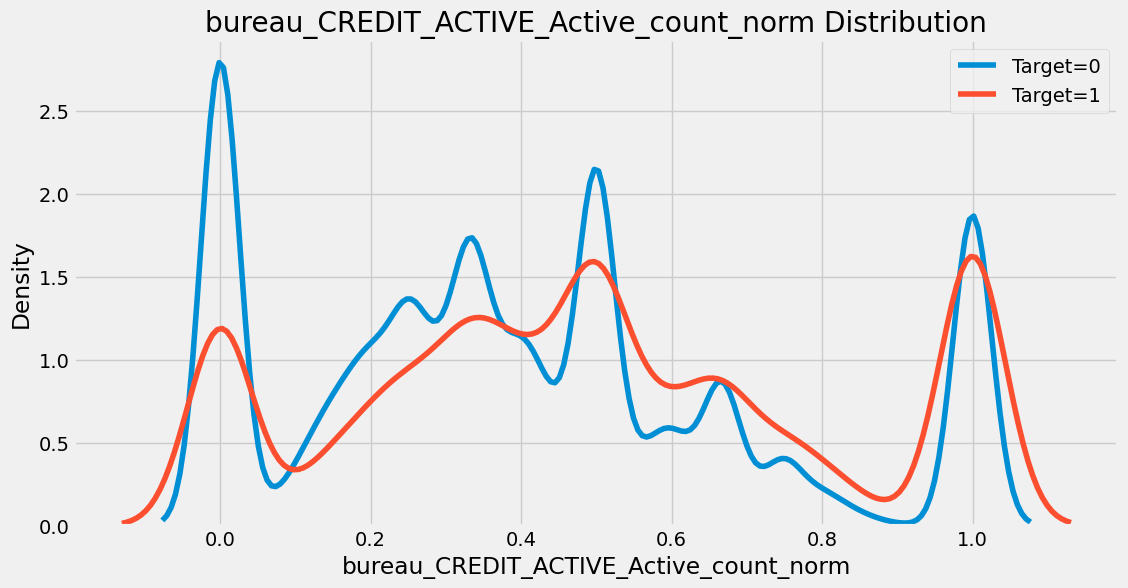

In [59]:
kde_target('bureau_CREDIT_ACTIVE_Active_count_norm', df=train)

In [60]:
corrs=train.corr()

In [61]:
corrs

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_currency 3_count_norm,bureau_CREDIT_CURRENCY_currency 4_count,bureau_CREDIT_CURRENCY_currency 4_count_norm,bureau_CREDIT_TYPE_Another type of loan_count,bureau_CREDIT_TYPE_Another type of loan_count_norm,bureau_CREDIT_TYPE_Car loan_count,bureau_CREDIT_TYPE_Car loan_count_norm,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count,bureau_CREDIT_TYPE_Cash loan (non-earmarked)_count_norm,bureau_CREDIT_TYPE_Consumer credit_count,bureau_CREDIT_TYPE_Consumer credit_count_norm,bureau_CREDIT_TYPE_Credit card_count,bureau_CREDIT_TYPE_Credit card_count_norm,bureau_CREDIT_TYPE_Interbank credit_count,bureau_CREDIT_TYPE_Interbank credit_count_norm,bureau_CREDIT_TYPE_Loan for business development_count,bureau_CREDIT_TYPE_Loan for business development_count_norm,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count,bureau_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mobile operator loan_count,bureau_CREDIT_TYPE_Mobile operator loan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown 

In [78]:
cols_to_remove=[]

for r in range(len(corrs)):
    for c in range(r):
#         print(f'\t {corrs.columns[c]} ==', corrs.iloc[r,c])
        if corrs.iloc[r,c]>0.8:
            cols_to_remove.append(corrs.columns[r])
            
cols_to_remove=set(cols_to_remove)
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  134


In [82]:
train_corrs_removed = train.drop(columns = cols_to_remove)
test_corrs_removed = test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 199)
Testing Corrs Removed Shape:  (48744, 198)


In [84]:
train_corrs_removed.to_csv('data/train_bureau_corrs_removed.csv', index = False)
test_corrs_removed.to_csv('data/test_bureau_corrs_removed.csv', index = False)

# Modelling

In [85]:
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import gc

import matplotlib.pyplot as plt

In [91]:
def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [92]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

## Control

In [93]:
train_control = pd.read_csv('data/application_train.csv')
test_control = pd.read_csv('data/application_test.csv')

In [94]:
submission, fi, metrics = model(train_control, test_control)

Training Data Shape:  (307511, 241)
Testing Data Shape:  (48744, 241)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798402	train's binary_logloss: 0.548246	valid's auc: 0.760094	valid's binary_logloss: 0.561937
Early stopping, best iteration is:
[270]	train's auc: 0.809955	train's binary_logloss: 0.536899	valid's auc: 0.760435	valid's binary_logloss: 0.55484
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.798514	train's binary_logloss: 0.548241	valid's auc: 0.761102	valid's binary_logloss: 0.566424
Early stopping, best iteration is:
[223]	train's auc: 0.802473	train's binary_logloss: 0.544332	valid's auc: 0.761328	valid's binary_logloss: 0.564145
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.799641	train's binary_logloss: 0.546889	valid's auc: 0.750166	valid's binary_logloss: 0.564526
Early stopping, best iteration is:
[224]	train's auc: 0.803744	train's binary_logloss: 0.542767

In [96]:
pd.options.display.float_format = '{:.5f}'.format
metrics

,fold,train,valid
0,0,0.80996,0.76044
1,1,0.80247,0.76133
2,2,0.80374,0.75033
3,3,0.80967,0.76082
4,4,0.82884,0.76153
5,overall,0.81094,0.75890


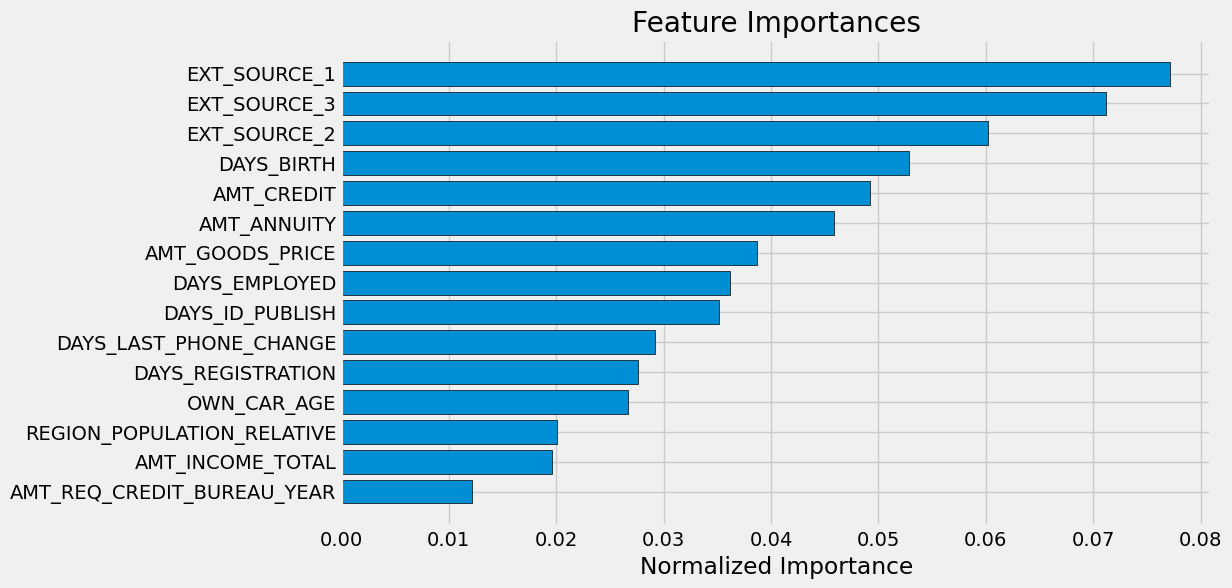

In [97]:
fi_sorted = plot_feature_importances(fi)

In [ ]:
# submission.to_csv('submissions/control.csv', index = False)

# Test one

In [98]:
submission_raw, fi_raw, metrics_raw = model(train, test)

Training Data Shape:  (307511, 452)
Testing Data Shape:  (48744, 452)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.810592	train's binary_logloss: 0.536844	valid's auc: 0.766574	valid's binary_logloss: 0.552573
Early stopping, best iteration is:
[283]	train's auc: 0.825534	train's binary_logloss: 0.521602	valid's auc: 0.767082	valid's binary_logloss: 0.543159
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.810124	train's binary_logloss: 0.537204	valid's auc: 0.766665	valid's binary_logloss: 0.557427
Early stopping, best iteration is:
[292]	train's auc: 0.827177	train's binary_logloss: 0.519816	valid's auc: 0.767108	valid's binary_logloss: 0.546829
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.811563	train's binary_logloss: 0.535453	valid's auc: 0.761068	valid's binary_logloss: 0.553559
Early stopping, best iteration is:
[209]	train's auc: 0.813405	train's binary_logloss: 0.53360

In [99]:
metrics_raw

,fold,train,valid
0,0,0.82553,0.76708
1,1,0.82718,0.76711
2,2,0.81341,0.76131
3,3,0.82546,0.76824
4,4,0.81442,0.76761
5,overall,0.82120,0.76626


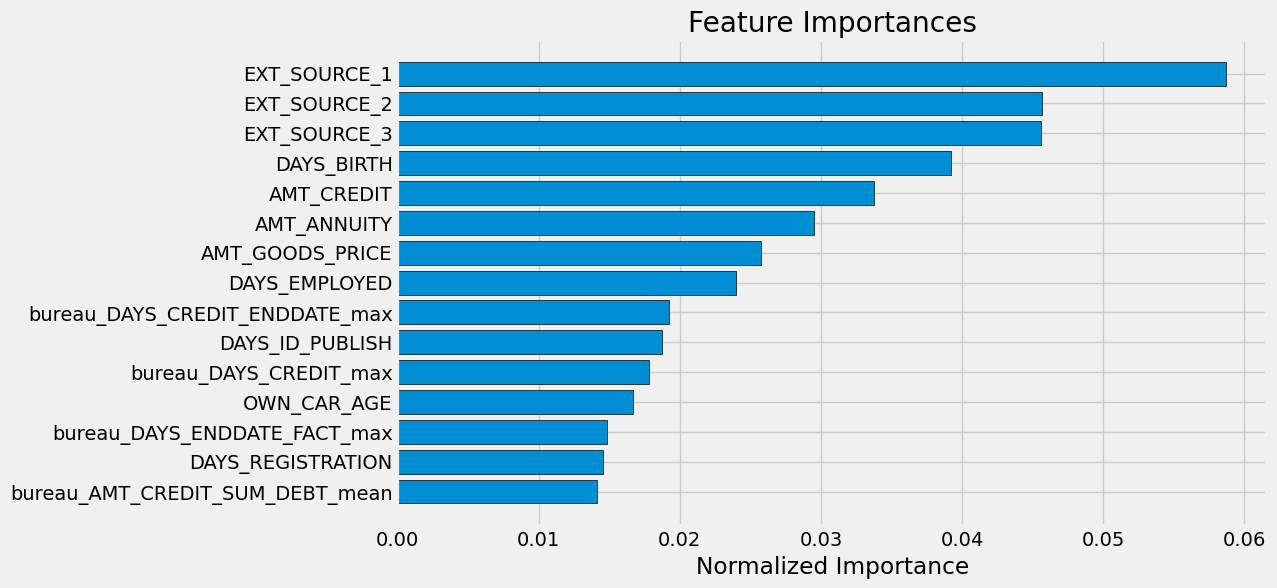

In [100]:
fi_raw_sorted = plot_feature_importances(fi_raw)

In [107]:
top_100 = list(fi_raw_sorted['feature'])[:100]
new_features = [x for x in top_100 if x not in list(fi['feature'])]

print(f'% of Top 100 Features created from the bureau data = {len(new_features)}')

% of Top 100 Features created from the bureau data = 51


In [101]:
# submission_raw.to_csv('submissions/test_one.csv', index = False)

## Test two

In [108]:
submission_corrs, fi_corrs, metrics_corr = model(train_corrs_removed, test_corrs_removed)

Training Data Shape:  (307511, 318)
Testing Data Shape:  (48744, 318)
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.806336	train's binary_logloss: 0.540883	valid's auc: 0.764055	valid's binary_logloss: 0.555785
Early stopping, best iteration is:
[290]	train's auc: 0.822193	train's binary_logloss: 0.525076	valid's auc: 0.764764	valid's binary_logloss: 0.545922
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.806675	train's binary_logloss: 0.540666	valid's auc: 0.765081	valid's binary_logloss: 0.559934
[400]	train's auc: 0.839304	train's binary_logloss: 0.507642	valid's auc: 0.764703	valid's binary_logloss: 0.539294
Early stopping, best iteration is:
[311]	train's auc: 0.825926	train's binary_logloss: 0.521364	valid's auc: 0.765381	valid's binary_logloss: 0.547663
Training until validation scores don't improve for 100 rounds
[200]	train's auc: 0.807923	train's binary_logloss: 0.539039	valid's auc: 0.756987	valid's bin

In [109]:
metrics_corr

,fold,train,valid
0,0,0.82219,0.76476
1,1,0.82593,0.76538
2,2,0.82467,0.75721
3,3,0.81394,0.76505
4,4,0.81961,0.76465
5,overall,0.82127,0.76338


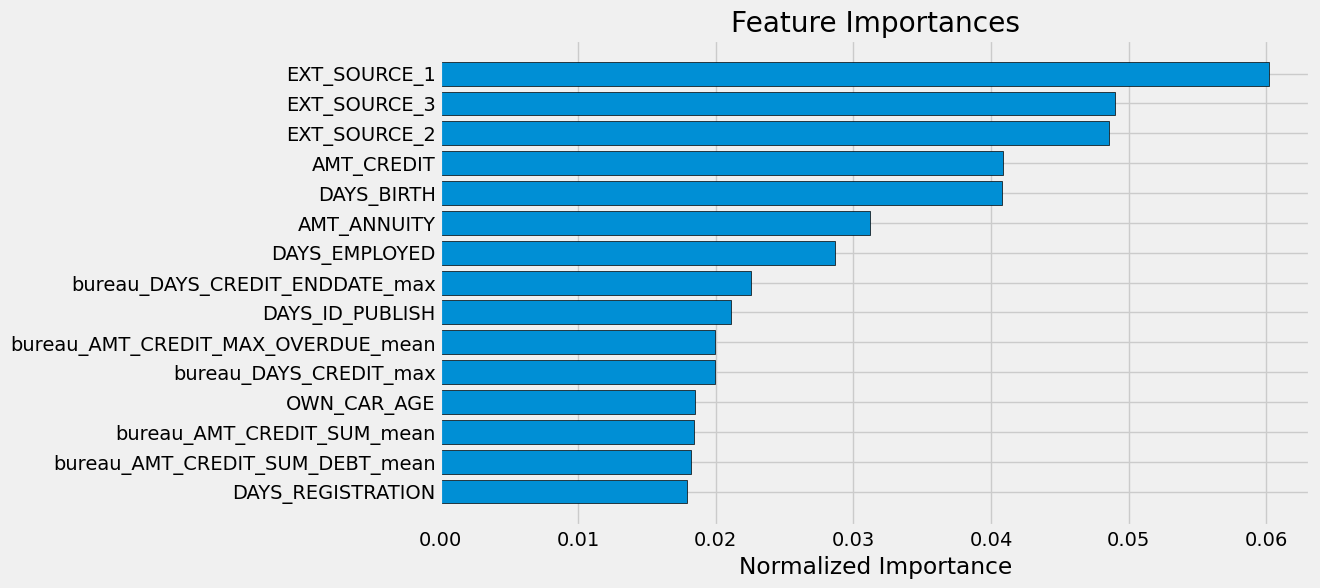

In [110]:
fi_corrs_sorted = plot_feature_importances(fi_corrs)

In [111]:
# submission_corrs.to_csv('submissions/test_two.csv', index = False)